In [1]:
import os
os.chdir('mmsegmentation')
os.getcwd()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

# 模型 config 配置文件
config_file = 'one77-Configs/one77_Mask2Former.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'checkpoint/Mask2Former,b=1,lr=1e-5.pth'

# device = 'cpu'
device = 'cuda:0'

model = init_model(config_file, checkpoint_file, device=device)

Loads checkpoint by local backend from path: checkpoint/Mask2Former,b=1,lr=1e-5.pth


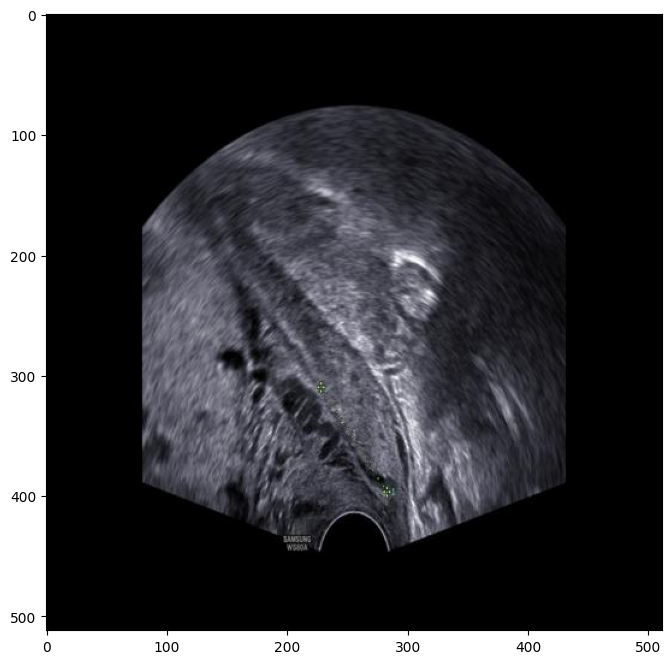

/root/anaconda3/envs/dl/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


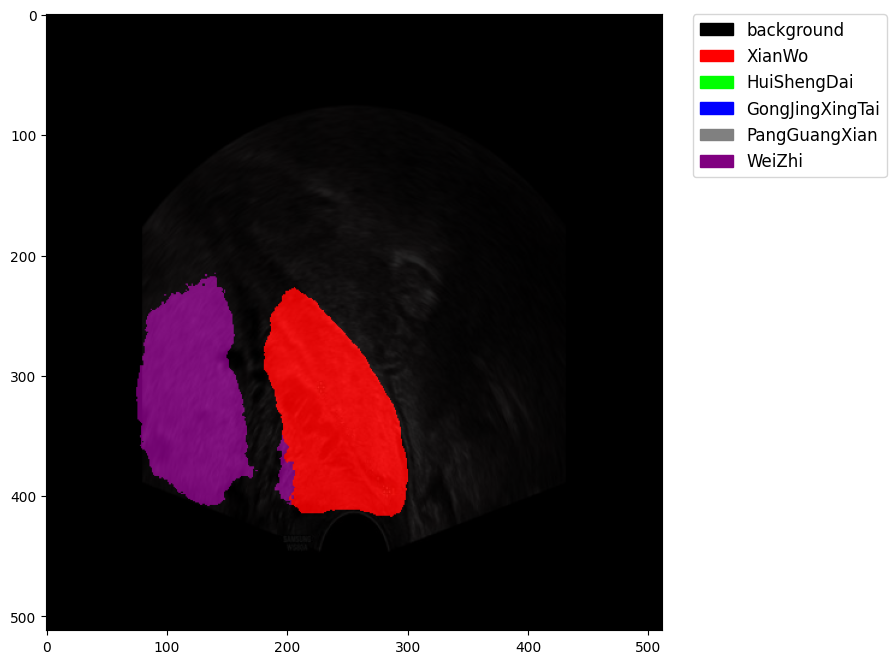

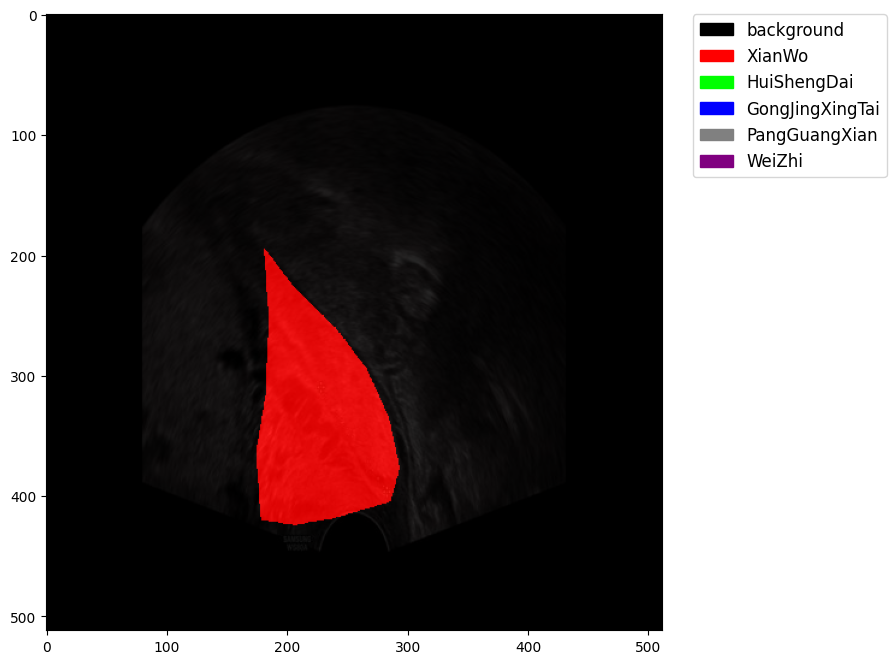

In [2]:
img_path = 'mydata/img_dir/val/1278.jpg'
label_path = 'mydata/ann_dir/val/1278.png'
img_bgr = cv2.imread(img_path)
plt.figure(figsize=(8, 8))
plt.imshow(img_bgr[:,:,::-1])
plt.show()
result = inference_model(model, img_bgr)
result.keys()
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
pred_mask.shape
np.unique(pred_mask)
from mmseg.datasets import One77Dataset
import numpy as np
import mmcv 
from PIL import Image

# 获取类别名和调色板
classes = One77Dataset.METAINFO['classes']
palette = One77Dataset.METAINFO['palette']
opacity = 0.15 # 透明度，越大越接近原图

# 将分割图按调色板染色
# seg_map = result[0].astype('uint8')
seg_map = pred_mask.astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 8))
img_plot = ((np.array(seg_img.convert('RGB')))*(1-opacity) + mmcv.imread(img_path)*opacity) / 255
im = plt.imshow(img_plot)

# 为每一种颜色创建一个图例
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.savefig('outputs/K1-6.jpg')
plt.show()


label = cv2.imread(label_path)
label.shape
label_mask = label[:,:,0]
label_mask.shape
np.unique(label_mask)
from mmseg.datasets import One77Dataset
import numpy as np
import mmcv 
from PIL import Image

# 获取类别名和调色板
classes = One77Dataset.METAINFO['classes']
palette = One77Dataset.METAINFO['palette']
opacity = 0.15 # 透明度，越大越接近原图

# 将分割图按调色板染色
# seg_map = result[0].astype('uint8')
seg_map = label_mask.astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 8))
img_plot = ((np.array(seg_img.convert('RGB')))*(1-opacity) + mmcv.imread(img_path)*opacity) / 255
im = plt.imshow(img_plot)

# 为每一种颜色创建一个图例
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.savefig('outputs/K1-6.jpg')
plt.show()

['background', 'XianWo', 'HuiShengDai', 'GongJingXingTai', 'PangGuangXian', 'WeiZhi']


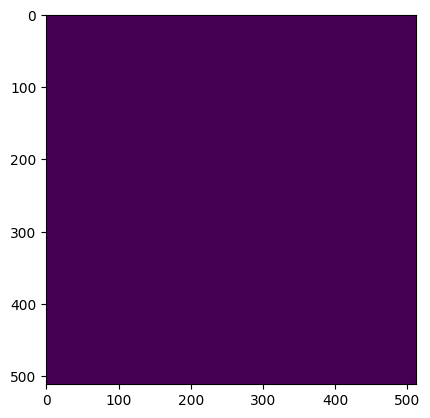

In [3]:
# 测试集标注
label_mask.shape
# 语义分割预测结果
pred_mask.shape
print(classes)
# 真实为 西瓜红瓤，预测为 西瓜红壤
TP = (label_mask == 5) & (pred_mask==1)
plt.imshow(TP)
plt.show()
#胎盘陷窝识别成胎盘位置